# Wine Dataset: PCA & Logistic Regression

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset1 = pd.read_csv('./Metodi numerici per la DS/Dataset/Wine-Dataset/winequality-red.csv',delimiter=';')
dataset1["Class"] = 0
dataset2 = pd.read_csv('./Metodi numerici per la DS/Dataset/Wine-Dataset/winequality-white.csv',delimiter=';')
dataset2["Class"] = 1
dataset = pd.concat([dataset1, dataset2])


In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Distribuzione dei dati per feature "quality"
Da quanto segue si evince che il numero di vini è diverso per ogni qualità, pertanto si può affermare che il dataset è sbilanciato: ci sono molti vini di qualità 5, 6 e 7, e pochi vini di qualità 3, 4, 5, 8, 9.
Pertanto si prevede che la retta approssimerà meglio la qualità dei vini 5, 6 e 7, perchè è lì che è presente la maggior parte dei dati.

In [4]:
dataset1['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

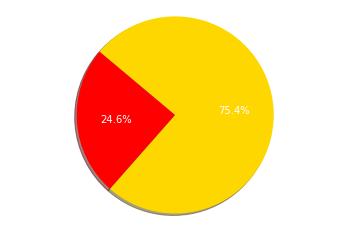

In [53]:
#Plot dei vini per classe
import matplotlib.pyplot as plt

# Data to plot
labels = ['Red', 'White']
sizes = [len(dataset1), len(dataset2)]
colors = ['red', 'gold']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140, textprops={'color':"w"}) #Con tema bianco, rimuovere l'attributo textprops

plt.axis('equal')
plt.show()

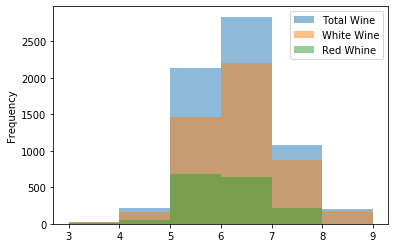

In [6]:
ax = dataset['quality'].plot.hist(bins=6, alpha=0.5)
ax = dataset2['quality'].plot.hist(bins=6, alpha=0.5)
ax = dataset1['quality'].plot.hist(bins=5, alpha=0.5)
ax.legend(["Total Wine", "White Wine", 'Red Whine']);

In [7]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
x = dataset.drop(['quality'],axis=1)
y = dataset['quality'].values
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1, shuffle=True)

print(x_train.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Class'],
      dtype='object')


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
#pca = PCA(0.80) #Si imposta il modello fermandosi quando si ha il 95% della varianza spiegata
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

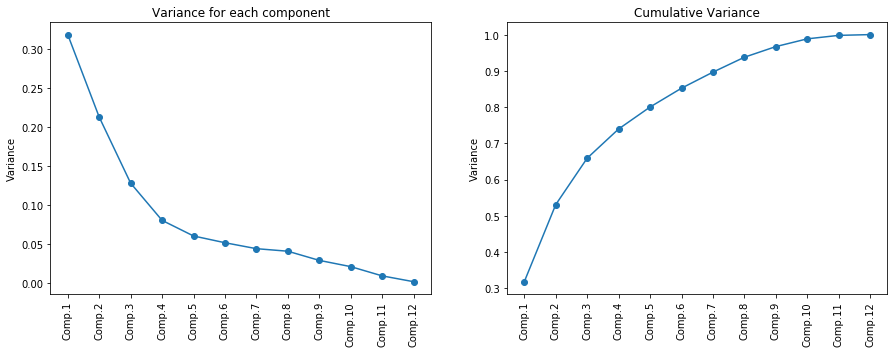

In [10]:
y = pca.explained_variance_ratio_
x = np.arange(len(y)) + 1

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(x, y, "o-")
plt.title("Variance for each component")
plt.xticks(x, ["Comp."+str(i) for i in x], rotation=90)
plt.ylabel("Variance")

y2 = np.cumsum((pca.explained_variance_ratio_))

plt.subplot(1, 2, 2)
plt.plot(x, y2, "o-")
plt.xticks(x, ["Comp."+str(i) for i in x], rotation=90)
plt.title("Cumulative Variance")
plt.ylabel("Variance")
plt.show()

In [11]:
#Ottenuto il grafico, richiamo PCA sul numero delle componenti prefissate dall'utente e ne eseguo il fit
pca = PCA(n_components=8)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

#Stampa dei valori della PCA
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[[ 0.24793237  0.35865268 -0.12292603 -0.24574352  0.2908113  -0.34232161
  -0.41333815  0.14026993  0.19418423  0.28528493  0.02494674 -0.47159346]
 [ 0.27899132  0.04314754  0.20445899  0.39748782  0.24972249  0.16040544
   0.19191568  0.55832588 -0.20314256  0.12742053 -0.46950214 -0.07691746]
 [ 0.45317741 -0.29051596  0.59064288 -0.18301375  0.00487614 -0.15759546
  -0.12684385 -0.16098756 -0.42666955  0.10602437  0.25691363  0.04145509]
 [-0.16701457 -0.19160741  0.25498404 -0.14146275  0.22885918  0.39200672
   0.21374524 -0.06955815  0.41986973  0.63328366  0.12739328 -0.01500562]
 [ 0.15999533 -0.12595807  0.15921678  0.35903779 -0.64788914 -0.15621677
  -0.12513323  0.30179692  0.43927377  0.09018652  0.21411963 -0.08019944]
 [ 0.27310678  0.51695337 -0.17002794  0.13147141 -0.14675653  0.45764157
   0.19573579 -0.04323431 -0.25146863  0.0873562   0.50587665 -0.11850699]
 [-0.2881057  -0.14791403 -0.31247782  0.41460467  0.04396416 -0.30732542
  -0.13138375 -0.0206199  -0.402

## Regressione Logistica

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs', n_jobs=-1)

In [14]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Predict for more observation
y_predicted = logisticRegr.predict(x_test)

In [16]:
print("Score: ",logisticRegr.score(x_test, y_test))

Score:  0.5261538461538462


In [17]:
#(X_test, logisticRegr.coef_ * X_test + logisticRegr.intercept_)
print(logisticRegr.intercept_)
print("COEFFICIENTI: \n",logisticRegr.coef_)

[-2.0707186   0.04937831  2.49838416  3.04209319  1.63154443 -0.44623462
 -4.70444686]
COEFFICIENTI: 
 [[ 2.03242964e-01  3.72969694e-01 -2.56536968e-01 -7.86862686e-02
  -6.40776415e-01  5.05308498e-01 -3.99469525e-01  4.25047573e-01]
 [ 2.33757506e-01  1.71419317e-01 -3.33349942e-01 -6.97829428e-01
  -6.76225784e-01 -6.17650116e-01 -2.45407610e-01  2.24249901e-01]
 [ 1.80986499e-01  5.33871802e-01 -3.21201865e-01 -1.66780873e-01
  -6.42975842e-01 -5.95407503e-01 -2.16647825e-01 -3.12843173e-01]
 [ 7.38084804e-02  1.44292893e-01  2.13572716e-03  1.42146268e-01
  -2.46454320e-01 -3.18811973e-01  2.97855423e-01 -3.44451904e-02]
 [-7.04453521e-02 -2.44035689e-01  2.88263150e-01  3.07036965e-01
   4.39745503e-01  2.55247716e-04  4.83473171e-01 -2.05229614e-01]
 [-2.78976335e-01 -2.90580750e-01  2.61832646e-01  4.45263285e-01
   3.41182157e-01  4.51828200e-01  5.60804384e-01  2.53468587e-01]
 [-3.42373762e-01 -6.87937266e-01  3.58857252e-01  4.88500512e-02
   1.42550470e+00  5.74477646e-01

## Analisi dei Residui

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.6748717948717948
R score: 0.10011856048425705
Mean Absolute Error: 0.5384615384615384


## Analisi Performance
Dal codice seguente si evince che i valori predetti ricadono all'interno di un intervallo discreto compreso tra 5 e 7, a differenza dei valori presenti nel test set, che ha valori in un intervallo compreso tra 3 e 9.
Questo accade per le motivazioni esposte nel paragrafo "Distribuzione dei dati per feature quality".

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df.describe()

,Actual,Predicted
count,1950.000000,1950.000000
mean,5.809744,5.735897
std,0.866222,0.566278
min,3.000000,4.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,9.000000,7.000000


Si riporta inoltre un istogramma per confrontare i primi 40 valori reali con quelli predetti.

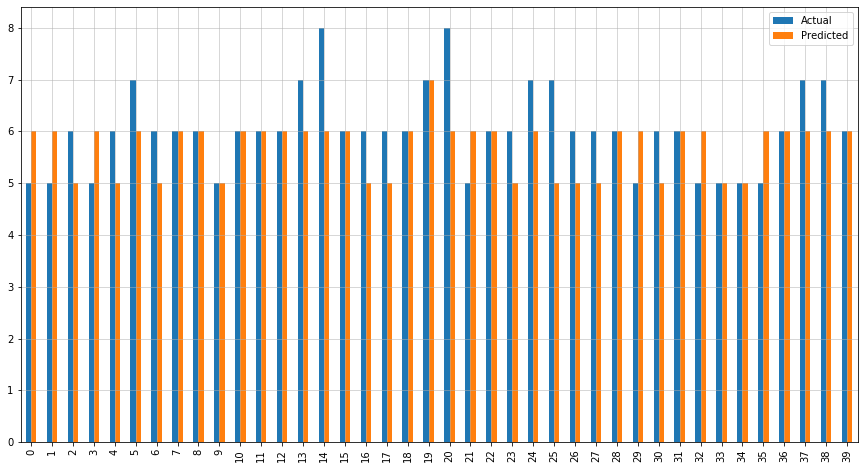

In [20]:
df = df.head(40)
df.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()